In [15]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbf{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\z}{\mathbf{z}}$
$\newcommand{\Y}{\mathbf{Y}}$
$\newcommand{\Z}{\mathbf{Z}}$
$\newcommand{\a}{\mathbf{a}}$
$\newcommand{\W}{\mathbf{W}}$

$\newcommand{\condit}{\thinspace\rvert\thinspace}$

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from ggplot import *

In [18]:
from matplotlib import colors as clrs
from matplotlib.colors import ListedColormap

In [19]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import laplace
from scipy.stats import beta
from scipy.stats import binom

### Bayes theorem
* Let $H$ stand for *hypothesis* and $D$ stand for *data*. 
* In terms of $D$ and $H$ Bayes theorem looks like:
$$\displaystyle{\color{blue}{\pr(H\condit D)=\frac{\pr(D\condit H)\pr(H)}{\pr(D)}}}$$
* Conditional probability:
$$\displaystyle{\pr(H\condit D)=\frac{\pr(H,D)}{\pr(D)}}$$
* From product rule one gets: $$\displaystyle{\pr(H,D)=\pr(H\condit D)\pr(D)}$$ and also $$\displaystyle{\pr(D,H)=\pr(D\condit H)\pr(H)},$$
from which follows the equality: $$\displaystyle{\pr(H\condit D)\pr(D)=\pr(D\condit H)\pr(H)}$$
and finally the Bayes theorem statement follows.

### Conjugate priors

### Beta-Binomial model
*for fair coin tossing testing.* 
* Consider a coin tossing model. Let the probability of getting *head* 
be represented by a Bernulli probability distribution: $\displaystyle{\pr(X=H)=\theta}$. 
* This means, that getting $x$ 
heads in a series of $n$ independent trials has the probability, described by a Binomial distribution 
$\displaystyle{\pr\left(\sum_{k=1}^nX_k=x\condit \theta\right)=C_n^k\theta^k(1-\theta)^{n-k}}$, where 
$\displaystyle{C_n^k=\frac{n!}{k!(n-k)!}}$ - is the binomial coefficient.

In [21]:
x = binom(n=10, p=0.5).rvs(size=100)

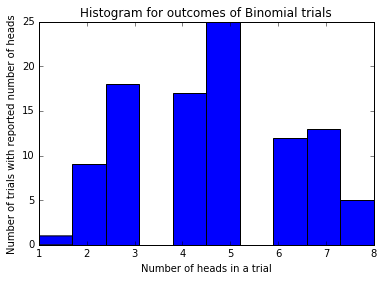

In [22]:
plt.hist(x)
plt.title('Histogram for outcomes of Binomial trials')
plt.xlabel('Number of heads in a trial')
plt.ylabel('Number of trials with reported number of heads');

**What can be said about the $\theta$ parameter beforehand?** 

* We are sure $\theta$ to be somewhere between 0 and 1. 
* A good candidate to describe such prior information is the Beta distribution with density function
$$\displaystyle{p_{\alpha,\beta}(\theta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}}$$

In [23]:
x = beta(a=2., b=2.).rvs(size=1000)

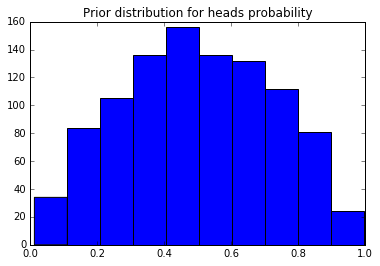

In [24]:
plt.hist(x)
plt.title('Prior distribution for heads probability');

From the Bayes theorem follows, that 
$$\displaystyle{p(\theta\condit X)\propto C_n^x\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha+x-1}(1-\theta)^{\beta+n-x-1}\sim B(\alpha+x,\beta+n-x)}$$

**Beta-Binomial model** description:

$\displaystyle{
\begin{array}{l}
X|\theta\sim B_n(\theta) \text{ - likelihood}\\
\theta \sim B(\alpha,\beta) \text{ - prior}
\end{array}
\Rightarrow \theta\condit (X=x) \sim B(\alpha+x,\beta+n-x) \text{ - posterior}
}$    

**The model:**
* **Likelihood** $\displaystyle{\pr(X=x\condit\theta)=\frac{n!}{(n-k)!k!}\theta^x(1-\theta)^{n-x}}$
* **Prior** $\displaystyle{p(\theta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}}$
* **Posterior** $\displaystyle{p(\theta\condit X=x)\sim B(\alpha+x,\beta+n-x)}$

In [25]:
class BetaBinomial(object):

    def __init__(self, prior_params=(1., 1.), dist=beta, x=np.linspace(0., 1., 100)):
        self.prior_params = prior_params
        self.dist = dist
        self.x = x

    def posterior(self, trials = None, observations = None):
        a_prior, b_prior = self.prior_params
        self.posterior_prob =[]
        self.ci = []
        for i, n in enumerate (trials):
            y = observations[i]
            post = self.dist(a_prior + y, b_prior + n - y)
            self.posterior_prob.append(post.pdf(self.x))
            self.ci.append(post.interval(0.95))
        return self.posterior_prob

In [30]:
a_prior = 10.
b_prior = 1.
n_trials = 250
prior_params = (a_prior, b_prior)
bb = BetaBinomial(prior_params)
true_theta = 0.25
trials = np.arange(n_trials)
observations = np.array ([binom (n = trials[i], p = true_theta).rvs (size = 1)[0] for i in range (len (trials))])
posterior = bb.posterior (trials, observations)

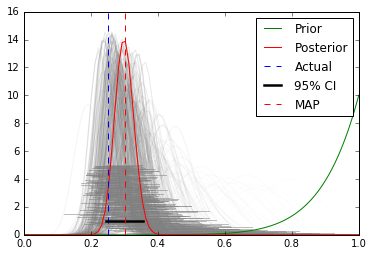

In [31]:
n = len (trials)
for i in range (n):
    plt.plot(bb.x, posterior[i], color='grey', alpha=i ** 0.7 / n)
    plt.axhline(0.02 * i, bb.ci[i][0], bb.ci[i][1], color='grey', linewidth=1., alpha=0.5)

plt.plot(bb.x, posterior[0], color='green', label='Prior')
plt.plot(bb.x, posterior[n - 1], color='red', label='Posterior')
plt.axvline(true_theta, linestyle='dashed', label='Actual')
plt.axhline(1.0, bb.ci[n - 1][0], bb.ci[n - 1][1], color='black', linewidth=2.5, label='95% CI')
plt.axvline(bb.x[np.where(posterior[n - 1] == np.max(posterior[n - 1]))[0][0]], linestyle='dashed', color='red', label='MAP')
plt.legend()
plt.show ()

Wrong initial guess (prior distribution) just leads to increased number of trials to get good estimates of the parameter.
See the dynamic of grey-colored intermediate posteriors, approaching true value.

#### Normal model with normal prior
Consider the case of known variance and unknown mean
$$\displaystyle{\begin{array}{l}
x_i\condit \mu\sim N(\mu,\sigma^2) \\
\mu\sim N(\mu_0,\sigma_0^2)
\end{array}
\Rightarrow \mu\condit x_1,\ldots,x_n\sim N\left(S\left(\frac{\mu_0}{\sigma_0^2}+\frac{1}{\sigma^2}\sum_{i=1}^nx_i\right),S\right); 
S=\left(\frac{1}{\sigma_0^2}+\frac{n}{\sigma^2}\right)^{-1}
}$$

In [32]:
def posterior_norm(obs, sigma, mu_0, sigma_0):
    n = len (obs)
    sigma_post = (1 / sigma_0 ** 2 + n / sigma ** 2) ** - 1
    mu_post = sigma_post * (mu_0 / sigma_0 ** 2 + np.sum (obs) / sigma ** 2)
    return norm(loc=mu_post, scale=np.sqrt(sigma_post))

In [33]:
class ConjugateNormal(object):

    def __init__(self, prior_params=(0., 1.), dist=norm, x=np.linspace(-5., 5., 1000)):
        self.prior_params = prior_params
        self.dist = dist
        self.x = x

    def posterior(self, observations = None, sigma = 1.):
        a_prior, sigma_prior = self.prior_params
        self.posterior_prob =[]
        self.ci =[]
        for i in range(len(observations)):
            post = posterior_norm(observations[i], sigma, a_prior, sigma_prior)
            self.posterior_prob.append (post.pdf (self.x))
            self.ci.append (post.interval (0.95))
        return self.posterior_prob


In [38]:
a_prior = -2.
sigma_prior = 1.1
prior_params = (a_prior, sigma_prior)
cn = ConjugateNormal(prior_params)
true_theta = 1.
true_sigma = 1.
n_trials = 15
observations = np.array([norm(loc=true_theta, scale=true_sigma).rvs(size=i) for i in range(n_trials)])
posterior = cn.posterior(observations)

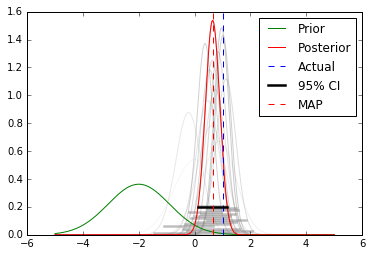

In [39]:
n = n_trials
for i in range(n):
    plt.plot(cn.x, posterior[i], color='grey', alpha=i ** 0.7 / n)
    plt.plot((cn.ci[i][0], cn.ci[i][1]), (0.015 * i, 0.015 * i), color='grey', linewidth=2.5, alpha=0.5)

plt.plot(cn.x, posterior[0], color='green', label='Prior')
plt.plot(cn.x, posterior[n - 1], color='red', label='Posterior')
plt.axvline(true_theta, linestyle='dashed', label='Actual')
plt.plot((cn.ci[n - 1][0], cn.ci[n - 1][1]), (0.2, 0.2), color='black', linewidth=2.5, label='95% CI')
plt.axvline(cn.x[np.where(posterior[n - 1] == np.max(posterior[n - 1]))[0][0]], linestyle='dashed', color='red', label='MAP')
plt.legend()
plt.show ()

Distributions, for which posterior belongs to the same family as the prior does, are called **conjugate**. 

In [40]:
import warnings
warnings.filterwarnings ("ignore")

### Random Walk Sampler
* Suppose our aim is **sample from the posterior distribution**. This can be done easily when algorithmic expression for the posterior distribution **is known**. 
But what to do in case, if this is **not** the case?

* Consider hypothesis $H_0$ about unknown parameter $\theta$: $H_0:\theta=\theta_0$. Let $\pr(\theta_0)$ be a prior distribution for the parameter.

* Let $X=(x_1,\ldots,x_n)$ be the available data for our analysis. Denote $\pr(X\condit\theta_0)$ - **likelihood function**.

* Applying **Bayes rule**, one can get expression for the **posterior** distribution: 
$$\displaystyle{\pr(\theta_0\condit X)=\frac{\pr(X\condit \theta_0)\pr(\theta_0)}{\pr(X)}}$$

* Suppose, we have **two concurrent hypothesis** about $\theta$: $H_0:\theta=\theta_0$ and $H_1:\theta=\theta_1$, then in
the **posterior probabilities ratio** 
$$\displaystyle{\frac{\pr(\theta_1\condit X)}{\pr(\theta_0\condit X)}=\frac{\pr(X\condit \theta_1)\pr(\theta_1)}{\pr(X\condit \theta_0)\pr(\theta_0)}}$$ we can get rid of **evidence** part $\pr(X)$.

* The greater is the posterior probability, the more likely is underlaying hypothesis. Let's favor the hypothesis, having the greater posterior probability.

* Having initial hypothesis $H_0:\theta=\theta_0$, how to produce a concurrent hypothesis? Let's sample it from **leading current hypothesis** distribution $\pr(\theta_0)$.

In [41]:
class RandomWalkSampler(object):

    def __init__(self, param = (0., 1.), state_dist = norm, param_dist = norm, size = 100, idx = 0):
        self.idx = idx
        self.param = param
        self.state = param[idx]
        self.param_dist = param_dist
        self.state_dist = state_dist
        self.size = size

    def likelihood(self, X, dist, param):
        return np.log (dist (param[0], param[1]).pdf (X)).sum ()

    def prior(self, x, dist, param):
        return dist (param[0], param[1]).pdf (x)

    def posterior(self, X, state, param):
        if self.idx == 0:
            _param = np.array ([state, param[1]])
        else:
            _param = np.array ([param[0], state])
        return self.likelihood(X, self.state_dist, _param) \
        + np.log(self.prior(state, self.param_dist, _param))

    def accept_proposal(self, X, proposal_state):
        current_posterior = self.posterior (X, self.state, self.param)
        proposal_posterior = self.posterior (X, proposal_state, self.param)
        return proposal_posterior > current_posterior

    def sampler(self, param = None, size = None):
        if size is None:
            size = self.size
        if param is None:
            param = self.param
        path =[]
        for i in range (size):
            proposal_state = self.param_dist (param[0], param[1]).rvs ()
            if self.accept_proposal (self.X, proposal_state):
                self.state = proposal_state
                param[self.idx] = self.state
            path.append (self.state)
        return path

    def fit(self, X, state = None, param = None, size = 100, idx = None):
        self.X = X
        if idx is None:
            idx = self.idx
        else:
            self.idx = idx
        if param is None:
            param = self.param
        if state is None:
            state = self.state
        self.path = self.sampler (param, size)
        return self.path

**Normal distribution, uknown mean, known variance**

In [42]:
obs = norm.rvs(loc=5, scale=1., size=100)
state = - 3.
param = np.array ([- 3., 1.])
param_dist = norm
state_dist = norm
rws = RandomWalkSampler (param, state_dist, param_dist)
posterior = rws.fit (obs, size = 100)

In [43]:
sample_mean = np.array([np.mean(obs[:i]) for i in range(1, len(obs))])

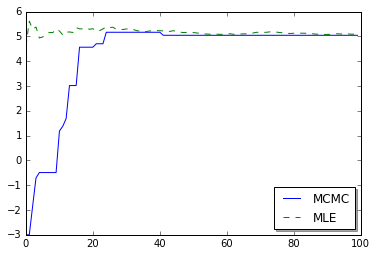

In [44]:
plt.plot(posterior, label='MCMC')
plt.plot(sample_mean, label='MLE', linestyle='dashed')
plt.legend(loc='lower right', shadow=True);

**Normal distribution, known mean, unknown variance**

In [45]:
obs = norm.rvs(loc=0., scale=.1, size=100)
state = 5.
param = np.array ([0., 1.])
param_dist = norm
state_dist = norm
rws = RandomWalkSampler (param, state_dist, param_dist, idx = 1)
posterior = rws.fit (obs, size = 100)

In [46]:
sample_sigma = np.array([np.sqrt(np.var(obs[:i])) for i in range(1, len(obs))])

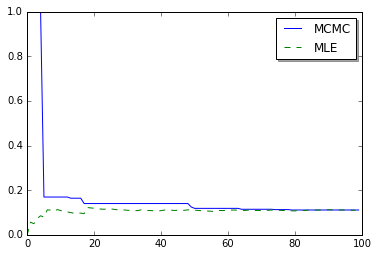

In [47]:
plt.plot(posterior, label='MCMC')
plt.plot(sample_sigma, label='MLE', linestyle='dashed')
plt.legend(loc='upper right', shadow=True);

In [48]:
from scipy.stats import multivariate_normal
from scipy.stats import t

### Bayesian sampler for linear regression model
Consider linear regression model: 
$\displaystyle{y=\beta\x+\varepsilon=(b_0,b_1)(1,x)^T}+\varepsilon$, where $\displaystyle{\varepsilon\sim N(0,\sigma^2)}$

Bayes rule takes the form $\displaystyle{\pr(\beta\condit y)=\frac{\pr(y\condit\beta)\pr(\beta)}{\pr(y)}}$ in this case.

Let's apply MC sampler to this model.

**Prior:** $\displaystyle{\pr(\beta)=N\left((0,0),\left(\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right)\right)}$ 

**Likelihood:** $\displaystyle{\pr(\y|\beta)=\prod_{k=1}^n \varphi\left(\beta\x_k,\sigma^2\right)}$, where $\varphi$ is the normal distribution density function.

In [49]:
def MAP(X, y, alpha=0.0):
    m = X.shape[1]
    I = np.identity (m)
    Rxx = np.dot (X.T, X)
    Ryx = np.dot (X.T, y)
    if alpha == 0.0:
        return np.dot (np.linalg.inv (Rxx), Ryx)
    elif alpha > 0.0:
        return np.dot (np.linalg.inv (Rxx + alpha * I), Ryx)

In [50]:
class BayesianLinearRegression(object):

    def __init__(self, sampl_dist=multivariate_normal, prior_dist=multivariate_normal, size=100, prior_param=[np.zeros(2), np.eye(2)], dim=2):
        self.sampl_dist = sampl_dist
        self.prior_dist = prior_dist
        self.size = size
        self.dim = dim
        self.prior_param = prior_param
        self.param = np.zeros (self.dim)

    def likelihood(self, X, dist, param):
        return np.log (dist (* param).pdf (X)).sum ()

    def prior(self, x, dist, param):
        return dist (* param).pdf (x)

    def joint(self, y, X, coef, param):
        sampl_mean = np.dot (coef, X)
        sampl_cov = np.eye (len (y))
        sampl_param =[sampl_mean, sampl_cov]
        return self.likelihood (y, self.sampl_dist, sampl_param) + np.log (self.prior (coef, self.prior_dist, param))

    def accept_proposal(self, proposal):
        current_joint = self.joint (self.y, self.X, self.param, self.prior_param)
        proposal_joint = self.joint (self.y, self.X, proposal, self.prior_param)
        alpha = min(proposal_joint / current_joint, 1.)
        return np.random.rand() > alpha

    def sampler(self, param=None, size=None):
        if size is None:
            size = self.size
        if param is None:
            param = self.param
        else:
            self.prior_param[0] = param
        path =[]
        self.loss =[]
        for i in range(size):
            proposal = self.prior_dist (* self.prior_param).rvs ()
            if self.accept_proposal(proposal):
                y = np.dot (proposal, self.X)
                self.loss.append (((self.y - y) ** 2).sum ())
                self.param = proposal
                self.prior_param[0] = proposal
            path.append (self.param)
        self.loss = np.array (self.loss)
        return np.array (path)

    def fit(self, y, X, param=None, size=100, sigma=1.):
        if sigma is not None:
            self.prior_param[1] = self.prior_param[1] * sigma
        self.y = y
        n = len (y)
        I = np.ones (n)
        self.X = np.vstack ((I, X))
        if param is None:
            param = self.param
        self.path = self.sampler (param, size)
        return self.path


Plot some points, distributed according to linear regression model:

True parameters are: 1.1 2.5


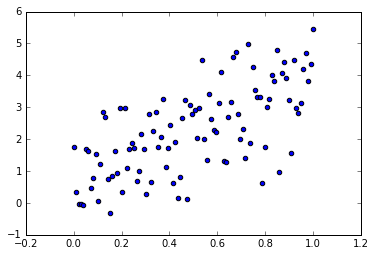

In [51]:
n = 100
e = norm(loc=0., scale=1.).rvs(size=n)
#e = t(df=2).rvs(size=n)
x = np.linspace (0, 1, n)
b0 = 1.1
b1 = 2.5
print("True parameters are:", b0, b1)
y = b0 + b1 * x + e
plt.scatter (x, y);

Estimate regression parameters via Bayesian Regression model and plot sampler path:

MCMC estimates: [ 1.41957797  1.8959171 ]


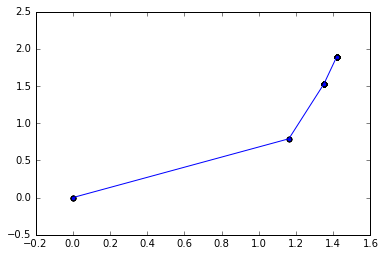

In [52]:
breg = BayesianLinearRegression ()
path = breg.fit(y, x, size=1000)
print("MCMC estimates:", breg.param)
plt.plot(path.T[0], path.T[1])
plt.scatter (path.T[0], path.T[1]);

ML estimates: [ 0.72873535  3.14833268]


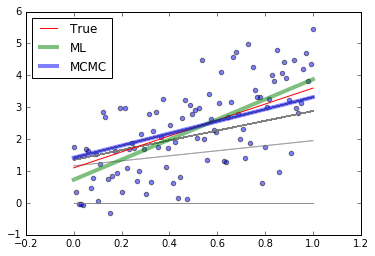

In [53]:
b_map = MAP (breg.X.T, breg.y)
print("ML estimates:", b_map)
y_act = np.dot ([b0, b1], breg.X)
y_map = np.dot (b_map, breg.X)
n = breg.path.shape[0]
plt.scatter (x, y, alpha = 0.5)
y_step = []
for i in range(n):
    y_est = np.dot (breg.path[i], breg.X)
    y_step.append(y_est)
    plt.plot (x, y_est, color = 'grey', alpha = 0.2)
plt.plot (x, y_act, color = 'red', label = 'True')
plt.plot (x, y_map, color = 'green', linewidth = 4, alpha = 0.5, label = 'ML')
y_est = np.dot (breg.param, breg.X)
plt.plot(x, y_est, color='blue', linewidth=4, alpha=0.5, label='MCMC')
plt.legend (loc = 2);